In [33]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [34]:
import sys
print(sys.executable)


c:\Users\Trisha\GitHub\Machine-Learning-Practice-by-Projects\venv\Scripts\python.exe


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import yfinance as yf


In [36]:
ticker = "NVDA"


price_df = yf.download(
ticker,
start="2018-01-01",
end="2024-01-01"
)


price_df.head()

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2018-01-02,4.928534,4.932242,4.808627,4.840272,355616000
2018-01-03,5.252898,5.283307,5.037313,5.045966,914704000
2018-01-04,5.280590,5.390855,5.258339,5.334239,583268000
2018-01-05,5.325338,5.362669,5.218534,5.295423,580124000
2018-01-08,5.488509,5.562678,5.403956,5.448952,881216000


# What This Data Represents Conceptually

Imagine a shop:

Open → price at opening time

High → highest price customers were willing to pay

Low → lowest price sellers accepted

Close → final agreed price when the shop closed

Volume → how many items were bought/sold

This is exactly that — but for company ownership shares.

Stock price = public opinion expressed in numbers

In [37]:
price_df.columns = price_df.columns.get_level_values(0)
price_df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,4.928534,4.932242,4.808627,4.840272,355616000
2018-01-03,5.252898,5.283307,5.037313,5.045966,914704000
2018-01-04,5.280590,5.390855,5.258339,5.334239,583268000
2018-01-05,5.325338,5.362669,5.218534,5.295423,580124000
2018-01-08,5.488509,5.562678,5.403956,5.448952,881216000


In [38]:
price_df = price_df.reset_index()

price_df = price_df[["Date", "Close", "Volume"]]
price_df = price_df.rename(columns={"Close": "price"})
price_df = price_df.dropna()

price_df.head()


Price,Date,price,Volume
0,2018-01-02,4.928534,355616000
1,2018-01-03,5.252898,914704000
2,2018-01-04,5.280590,583268000
3,2018-01-05,5.325338,580124000
4,2018-01-08,5.488509,881216000


In [45]:
# Use only recent data to reduce old-market noise
price_df = price_df.tail(500)

price_df.head()


Price,Date,price,Volume,time_index
1009,2022-01-04,29.233376,527154000,1009
1010,2022-01-05,27.550631,498064000,1010
1011,2022-01-06,28.123520,454186000,1011
1012,2022-01-07,27.194321,409939000,1012
1013,2022-01-10,27.347023,594681000,1013


In [49]:
# Use yesterday's price to predict today's price
price_df["prev_price"] = price_df["price"].shift(1)

price_df = price_df.dropna()
price_df.head()


Price,Date,price,Volume,time_index,prev_price
1010,2022-01-05,27.550631,498064000,1,29.233376
1011,2022-01-06,28.123520,454186000,2,27.550631
1012,2022-01-07,27.194321,409939000,3,28.123520
1013,2022-01-10,27.347023,594681000,4,27.194321
1014,2022-01-11,27.763222,404089000,5,27.347023


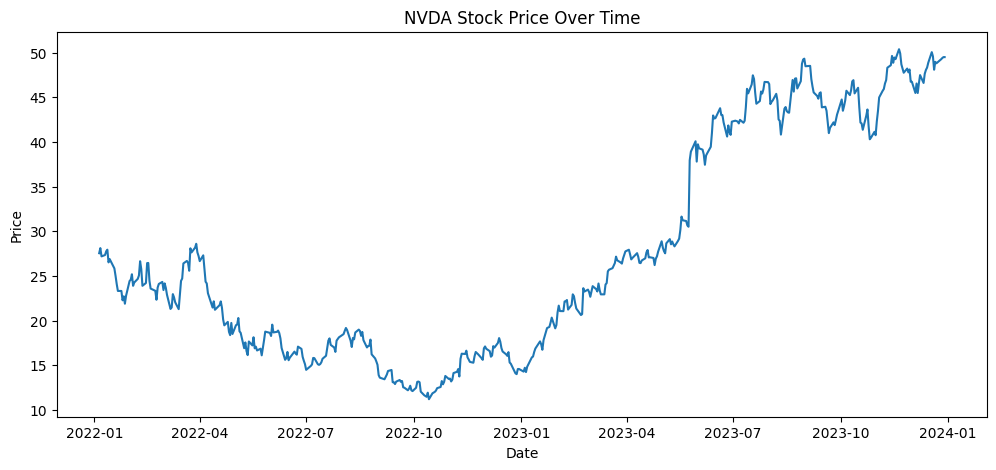

In [50]:
plt.figure(figsize=(12,5))
plt.plot(price_df["Date"], price_df["price"])
plt.title("NVDA Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [52]:
price_df["time_index"] = np.arange(len(price_df))
price_df.head()
X = price_df[["prev_price"]]
y = price_df["price"]



In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False  # VERY IMPORTANT for time-series
)


In [54]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


models the relationship by fitting a straight line—expressed as \(y=mx+b\) or \(y=\beta _{0}+\beta _{1}x\)—that minimizes the sum of squared differences (residuals) between predicted and actual data points. 

#### Linear regression works best when:

The relationship is approximately straight-line

Effects are additive

The problem is explainable, not just predictive

Data size is small to medium

You want clarity over complexity

Think: “If X increases by 1, how much does Y change?

In [55]:
y_pred = model.predict(X_test)


In [56]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.8149583933339568
RMSE: 1.041572042585216
R² Score: 0.8524444313877901


In [60]:
# Create a comparison table of actual vs predicted values
results_df = price_df.iloc[-len(y_test):].copy()

results_df["Actual_Price"] = y_test.values
results_df["Predicted_Price"] = y_pred
results_df["Error"] = results_df["Actual_Price"] - results_df["Predicted_Price"]

results_df[["Date", "Actual_Price", "Predicted_Price", "Error"]].head(10)


Price,Date,Actual_Price,Predicted_Price,Error
1409,2023-08-09,42.523064,44.715224,-2.192160
1410,2023-08-10,42.357185,42.602383,-0.245197
1411,2023-08-11,40.825298,42.436160,-1.610862
1412,2023-08-14,43.721188,40.901092,2.820095
1413,2023-08-15,43.908054,43.802994,0.105060
1414,2023-08-16,43.454388,43.990249,-0.535861
1415,2023-08-17,43.312485,43.535640,-0.223156
1416,2023-08-18,43.267521,43.393443,-0.125922
1417,2023-08-21,46.932854,43.348386,3.584468
1418,2023-08-22,45.634796,47.021329,-1.386533


What each column means (very simply)

Date
The trading day

Actual_Price
The real closing price from the market

Predicted_Price
What your model predicted for that day

Error
How far the prediction was from reality

Positive → model predicted lower than actual

Negative → model predicted higher than actual

## How to read this:

MAE → average error in price units

RMSE → penalizes large mistakes

R² → how much pattern the model captured (closer to 1 = better)

In [61]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: -0.008973343960640534
Coefficient: 1.0020763388945353


Meaning:

Coefficient ≈ how strongly yesterday’s price affects today’s

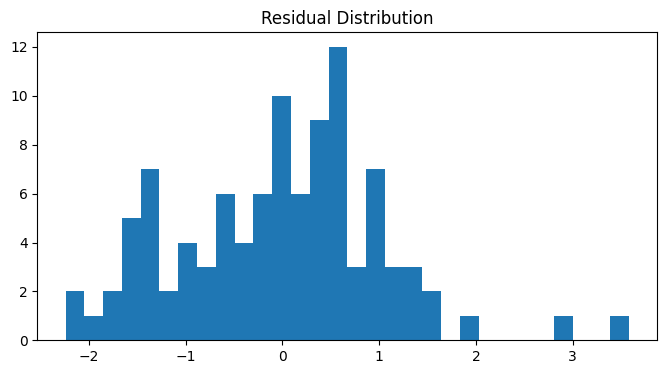

In [62]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()


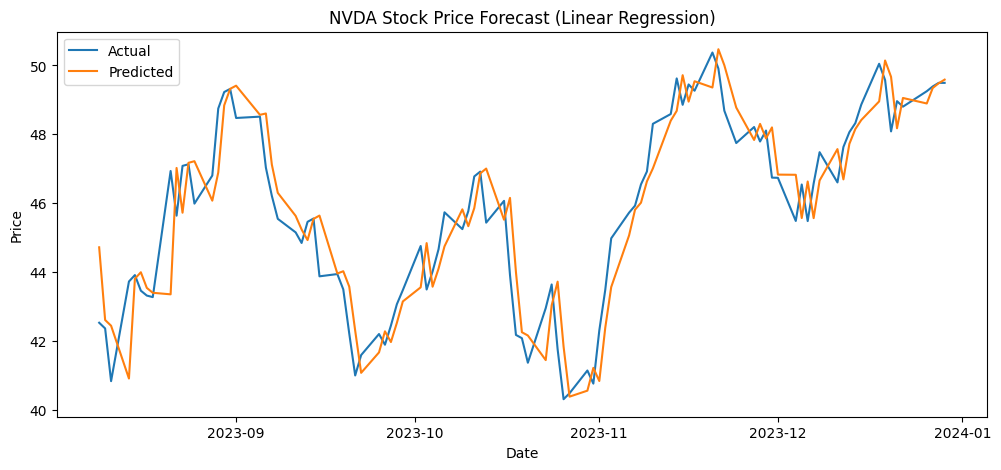

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(price_df["Date"].iloc[-len(y_test):], y_test.values, label="Actual")
plt.plot(price_df["Date"].iloc[-len(y_test):], y_pred, label="Predicted")
plt.title("NVDA Stock Price Forecast (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


The orange line closely follows the blue line.

That means:

Your model has learned the direction and shape of price movement

It understands when prices are rising, falling, or stabilizing

This visually confirms why your R² ≈ 0.85 is high.

Why the prediction is slightly “late” sometimes

You may notice:

The orange line sometimes lags behind the blue line

Sharp spikes or drops are not perfectly matched

This happens because:

Your model uses yesterday’s price to predict today’s price

So when the market suddenly jumps or drops:

The model reacts one step later

This is expected and normal for linear regression

This is not a bug — it’s a property of the model.